In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [26]:
titanic_train= pd.read_csv("/kaggle/input/titanic/train.csv")
titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [27]:
titanic_test = pd.read_csv("/kaggle/input/titanic/test.csv")
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
titanic_train.shape

(891, 12)

891 rows/passengers and 12 columns/data points in the titanic data set

In [29]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


oldest passenger = 80 years old, youngest passenger = 0.42 (5 months old)

In [30]:
titanic_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

549 dead, 342 alive passengers

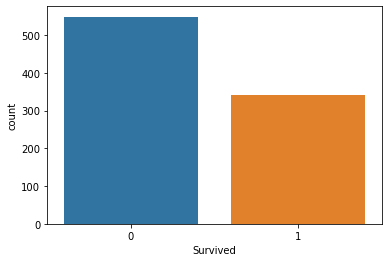

In [31]:
survived = titanic_train.Survived
sns.countplot(survived)
plt.show()

In [32]:
sex_women = titanic_train.loc[titanic_train.Sex == 'female']["Survived"]
alive_women = sum(sex_women)
num_women = len(sex_women)
print(f'number of alive women: {alive_women}')
print(f'total number of women: {num_women}')

number of alive women: 233
total number of women: 314


In [33]:
sex_men = titanic_train.loc[titanic_train.Sex == 'male']["Survived"]
alive_men = sum(sex_men)
num_men = len(sex_men)
print(f'number of alive men: {alive_men}')
print(f'total number of men: {num_men}')

number of alive men: 109
total number of men: 577


In [34]:
rate_survived_men = alive_men / num_men
rate_survived_women = alive_women / num_women
print(f'rate of survived men: {rate_survived_men}')
print(f'rate of survived women: {rate_survived_women}')

rate of survived men: 0.18890814558058924
rate of survived women: 0.7420382165605095


This means sex of the passangers plays an important rule in their survival

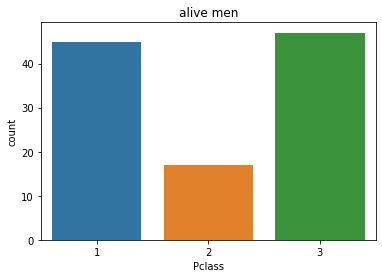

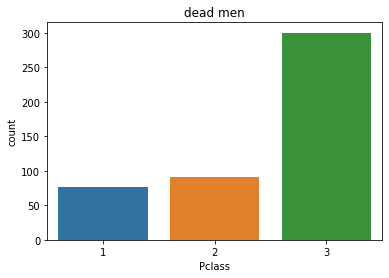

In [35]:
class_alive_men = titanic_train.loc[(titanic_train.Sex == 'male') & (titanic_train.Survived == 1)]['Pclass']
class_dead_men = titanic_train.loc[(titanic_train.Sex == 'male') & (titanic_train.Survived == 0)]['Pclass']
sns.countplot(class_alive_men, label = 'alive men')
plt.title('alive men')
plt.show()
sns.countplot(class_dead_men, label = 'dead men')
plt.title('dead men')
plt.show()

survived men where mostly from pclass 1 and 3. dead men where mostly from class 3.

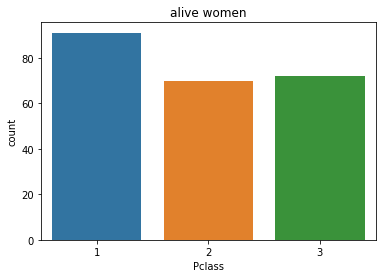

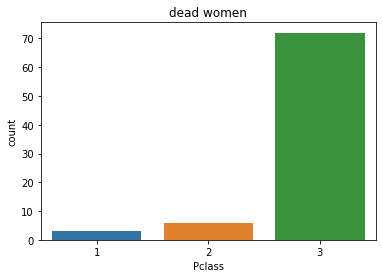

In [36]:
class_alive_women = titanic_train.loc[(titanic_train.Sex == 'female') & (titanic_train.Survived == 1)]['Pclass']
class_dead_women = titanic_train.loc[(titanic_train.Sex == 'female') & (titanic_train.Survived == 0)]['Pclass']
sns.countplot(class_alive_women)
plt.title('alive women')
plt.show()
sns.countplot(class_dead_women)
plt.title('dead women')
plt.show()

dead women were mostly from class 3

In [37]:
age = pd.cut(titanic_train['Age'], [0, 18, 80])
titanic_train.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [38]:
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
y = titanic_train["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(titanic_train[features])
X_testt = pd.get_dummies(titanic_test[features])

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [55]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1)
model = neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

In [56]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.7644435704861463

In [57]:
from sklearn.metrics import accuracy_score
print(accuracy_score( y_test, y_pred))
print(np.mean(y_test==y_pred))

0.7627118644067796
0.7627118644067796


In [58]:
predictions = neigh.predict(X_testt)

In [59]:
output = pd.DataFrame({'PassengerId': titanic_test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
